In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read Excel files with engine specified
# Try reading as CSV instead
calories_df = pd.read_csv('calories.csv.xls')
exercise_df = pd.read_csv('exercise.csv.xls')

# Display first few rows
print("Calories dataset:")
print(calories_df.head())

print("\nExercise dataset:")
print(exercise_df.head())

# Merge the two datasets
df = pd.merge(exercise_df, calories_df, on='User_ID')

print("\nCombined dataset:")
print(df.head())

Calories dataset:
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

Exercise dataset:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

Combined dataset:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100

In [ ]:
# Dataset information
print("\nDataset structure:")
print(df.info())

# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe().round(2))

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None

Descriptive statistics:
           User_ID       Age    Height    Weight  Duration  Heart_Rate  \
count     15000.00  15000.00  15000.00  15000.00  15000.00    15000.00   
mean   14977358.54     42.79    174.47     74.97     15.53       95.52   
std     2872851.45     16.98     14.26     15.04      8.32        9.58   
min    10001159.00     20.00    1

In [ ]:
# Calculate BMI if height and weight are present
if 'Weight' in df.columns and 'Height' in df.columns:
    df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

    # Create BMI categories
    df['BMI_Category'] = pd.cut(df['BMI'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create age groups if Age is present
if 'Age' in df.columns:
    df['Age_Group'] = pd.cut(df['Age'],
                          bins=[0, 25, 35, 45, 100],
                          labels=['<25', '25-35', '35-45', '45+'])

# Check the preprocessed dataset
print("Preprocessed dataset:")
print(df.head())

Preprocessed dataset:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories        BMI BMI_Category Age_Group  
0     231.0  26.038781   Overweight       45+  
1      66.0  21.773842       Normal       <25  
2      26.0  24.655910       Normal       45+  
3      71.0  22.159109       Normal     25-35  
4      35.0  24.456063       Normal     25-35  


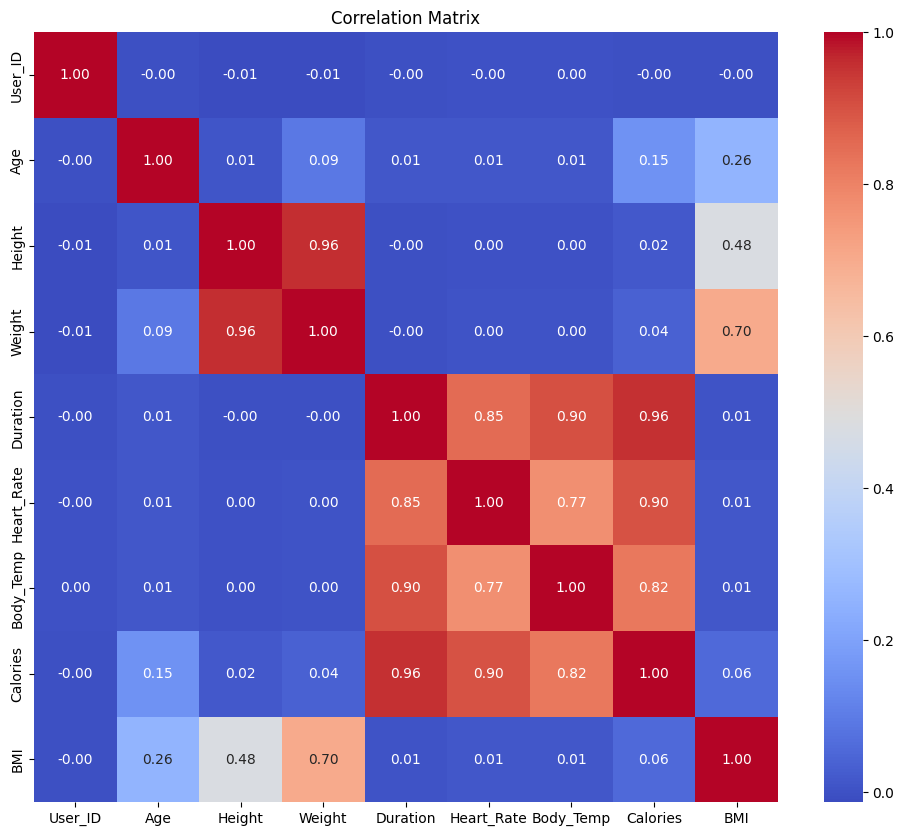

Correlations with Calories:
Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
BMI           0.056473
Weight        0.035481
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64


In [ ]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Variables with highest correlation to Calories
if 'Calories' in correlation_matrix.columns:
    calorie_correlations = correlation_matrix['Calories'].sort_values(ascending=False)
    print("Correlations with Calories:")
    print(calorie_correlations)

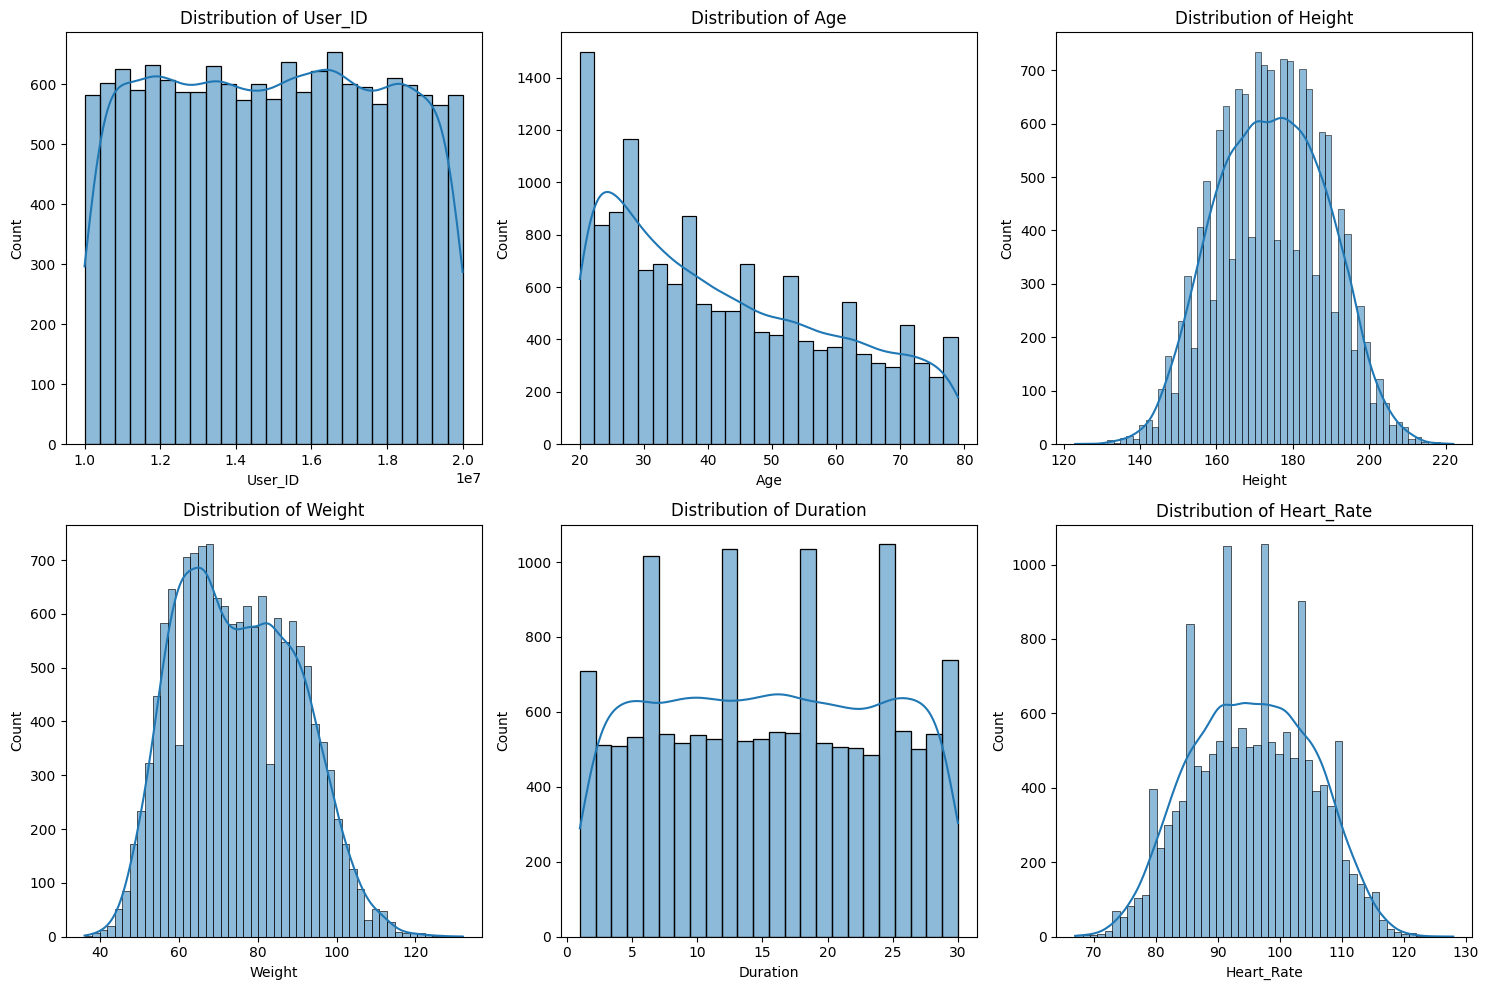

In [ ]:
# Distribution of numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:6]):  # Show first 6 columns
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('distributions.png')
plt.show()

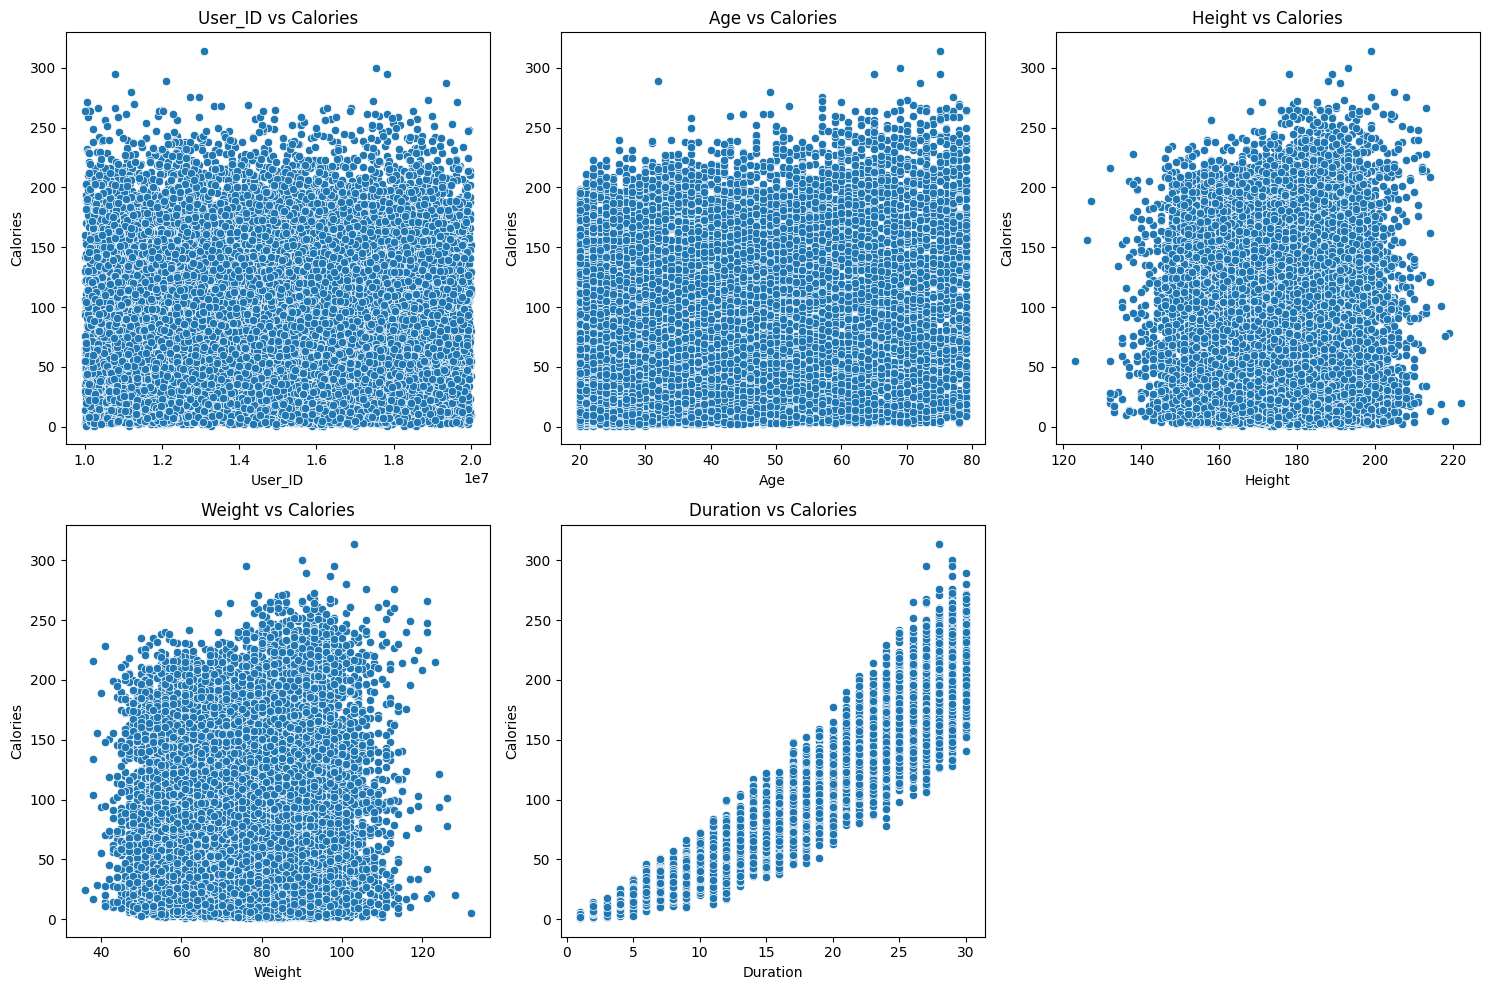

In [ ]:
# Relationship between Calories and other variables
plt.figure(figsize=(15, 10))
for i, col in enumerate([c for c in numerical_cols if c != 'Calories'][:5]):  # First 5 non-Calories variables
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[col], y=df['Calories'])
    plt.title(f'{col} vs Calories')
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

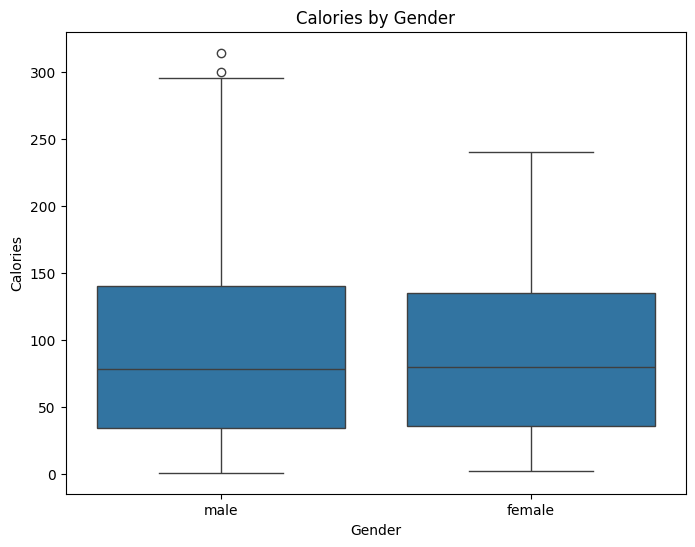

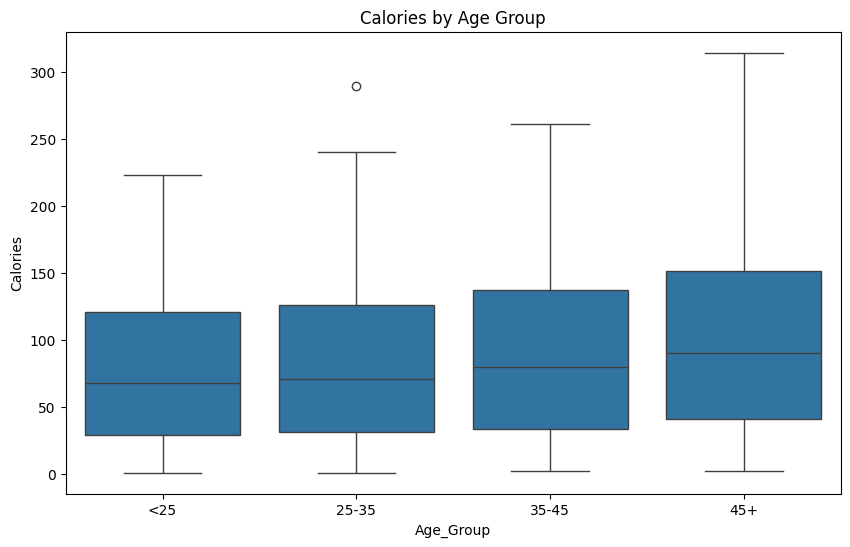

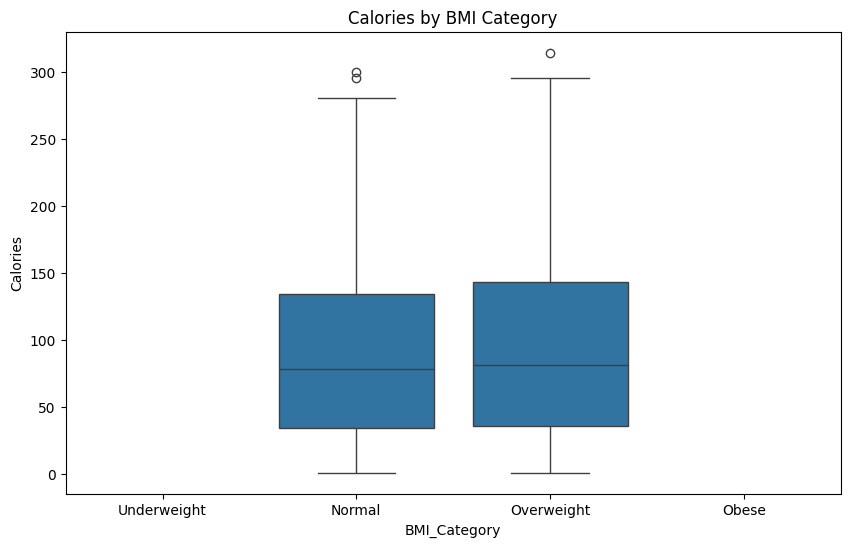

In [ ]:
# Analysis by categorical variables
if 'Gender' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y='Calories', data=df)
    plt.title('Calories by Gender')
    plt.savefig('calories_by_gender.png')
    plt.show()

if 'Age_Group' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Age_Group', y='Calories', data=df)
    plt.title('Calories by Age Group')
    plt.savefig('calories_by_age.png')
    plt.show()

if 'BMI_Category' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='BMI_Category', y='Calories', data=df)
    plt.title('Calories by BMI Category')
    plt.savefig('calories_by_bmi.png')
    plt.show()

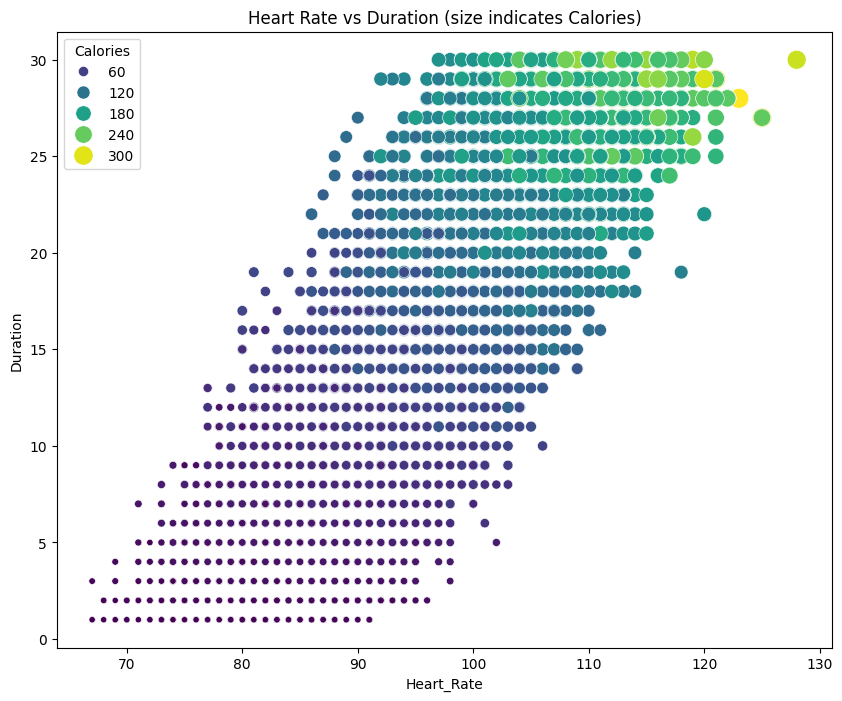

In [ ]:
# Multi-variable analysis
if 'Heart_Rate' in df.columns and 'Duration' in df.columns:
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(data=df, x='Heart_Rate', y='Duration',
                             size='Calories', hue='Calories',
                             sizes=(20, 200), palette='viridis')
    plt.title('Heart Rate vs Duration (size indicates Calories)')
    plt.savefig('heart_rate_duration_calories.png')
    plt.show()

In [15]:
# Save processed data
df.to_csv('processed_fitness_data.csv', index=False)
print("Processed data saved as 'processed_fitness_data.csv'")

# Download files
from google.colab import files
files.download('correlation_matrix.png')
files.download('distributions.png')
files.download('scatter_plots.png')
files.download('processed_fitness_data.csv')
if 'Gender' in df.columns:
    files.download('calories_by_gender.png')
if 'Age_Group' in df.columns:
    files.download('calories_by_age.png')
if 'BMI_Category' in df.columns:
    files.download('calories_by_bmi.png')
if 'Heart_Rate' in df.columns and 'Duration' in df.columns:
    files.download('heart_rate_duration_calories.png')

Processed data saved as 'processed_fitness_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>